In [87]:
# Handle necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# Load dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
validation = pd.read_csv('data/validation.csv')

In [90]:
# Sample training data
train.head(10)

In [91]:
# Look at the dataset fields
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

# <span style="color:blue">Data Exploration</span>. 

# 1. Basic Statistics

In [92]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_stats['cost'] = train.groupby('advertiser').payprice.sum().values
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions) * 1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.083%,68909.35,82552.64
1,2259,146778,45,13649026,0.031%,92990.95,303311.69
2,2261,120619,37,10789152,0.031%,89448.2,291598.7
3,2821,231416,144,20625766,0.062%,89128.52,143234.49
4,2997,54487,251,3413227,0.461%,62642.96,13598.51
5,3358,304782,233,28145288,0.076%,92345.64,120795.23
6,3386,498554,358,38341028,0.072%,76904.46,107097.84
7,3427,454031,340,36820111,0.075%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


# 2. User feedback analysis

In [93]:
# 1. Analyzing CTR per day of the week

daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())

click = train.groupby('weekday').click.value_counts()

imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) * 100).round(3)
daily_CTR['CTR_3358'] = ((daily_CTR.clicks_3358 / daily_CTR.imps_3358) * 100).round(3)

In [94]:
daily_CTR

,day,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,83994,33238,66,21,0.079,0.063
1,1,72204,30707,63,11,0.087,0.036
2,2,73810,26206,63,14,0.085,0.053
3,3,76509,81073,68,79,0.089,0.097
4,4,76835,41414,72,39,0.094,0.094
5,5,78485,58888,65,50,0.083,0.085
6,6,78456,33256,54,19,0.069,0.057


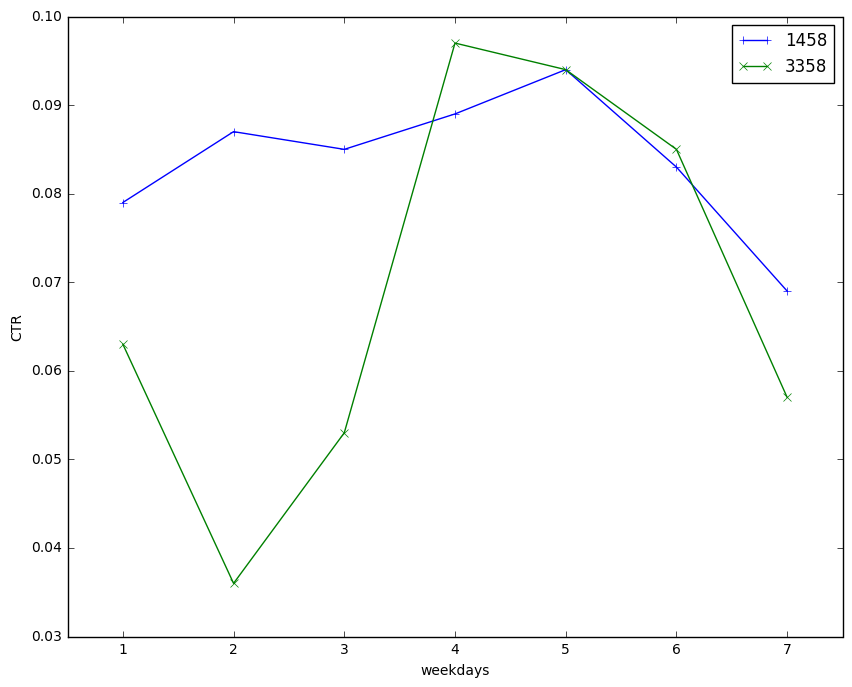

In [95]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,8)
plt.draw()
plt.show()

In [96]:
# 2. Analyzing CTR per hour
hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(train.hour.unique())

imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['clicks_3358'] = click3358

hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) * 100).round(3)
hourly_CTR['CTR_3358'] = ((hourly_CTR.clicks_3358 / hourly_CTR.imps_3358) * 100).round(3)

In [97]:
hourly_CTR

,hour,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,25499,72359,23,70,0.090,0.097
1,1,11251,7583,8,8,0.071,0.105
2,2,6811,3527,14,2,0.206,0.057
3,3,7189,1447,6,2,0.083,0.138
4,4,3580,1307,6,0,0.168,0.000
5,5,4292,1103,4,1,0.093,0.091
6,6,5138,2797,2,4,0.039,0.143
7,7,10675,2835,5,1,0.047,0.035
8,8,15682,7960,9,6,0.057,0.075
9,9,19621,4700,18,1,0.092,0.021


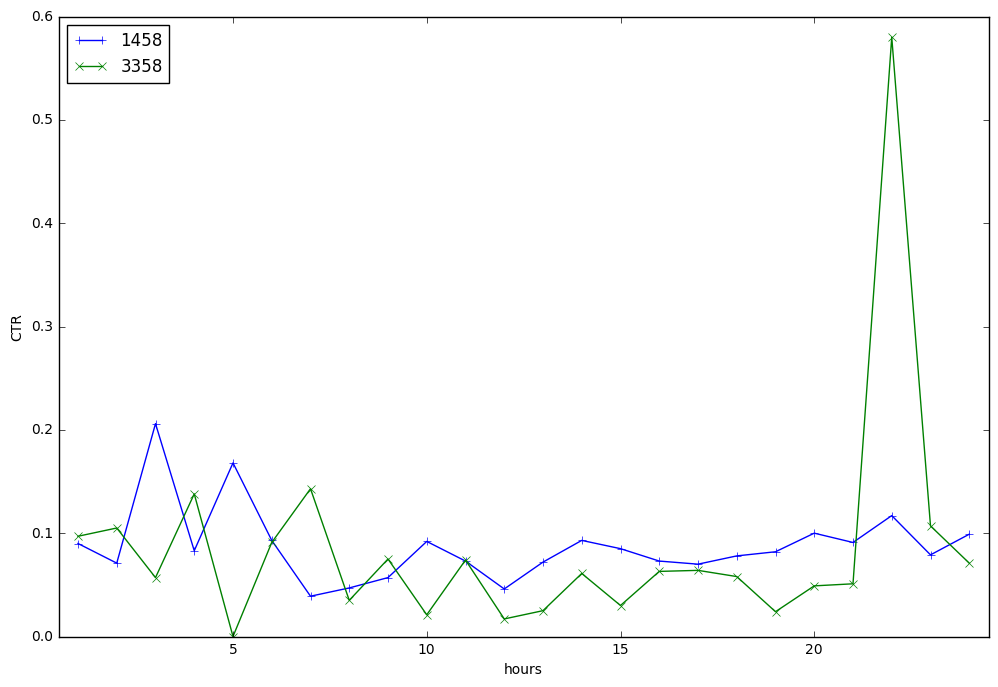

In [98]:
# Line plot of CTR per hour for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,8)
plt.draw()
plt.show()

In [99]:
# 3. Analyzing CTR per region
region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(train.region.unique())

imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = clickall_3358.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) * 100).round(3)

In [100]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.115,0.211
1,1,23389,12157,17,6,0.073,0.049
2,2,8875,4820,3,2,0.034,0.041
3,3,27398,13246,20,15,0.073,0.113
4,15,16674,7968,18,7,0.108,0.088
5,27,7616,3754,5,3,0.066,0.080
6,40,20449,8965,9,6,0.044,0.067
7,55,12091,4823,11,2,0.091,0.041
8,65,12566,5684,11,5,0.088,0.088
9,79,14300,9523,17,9,0.119,0.095


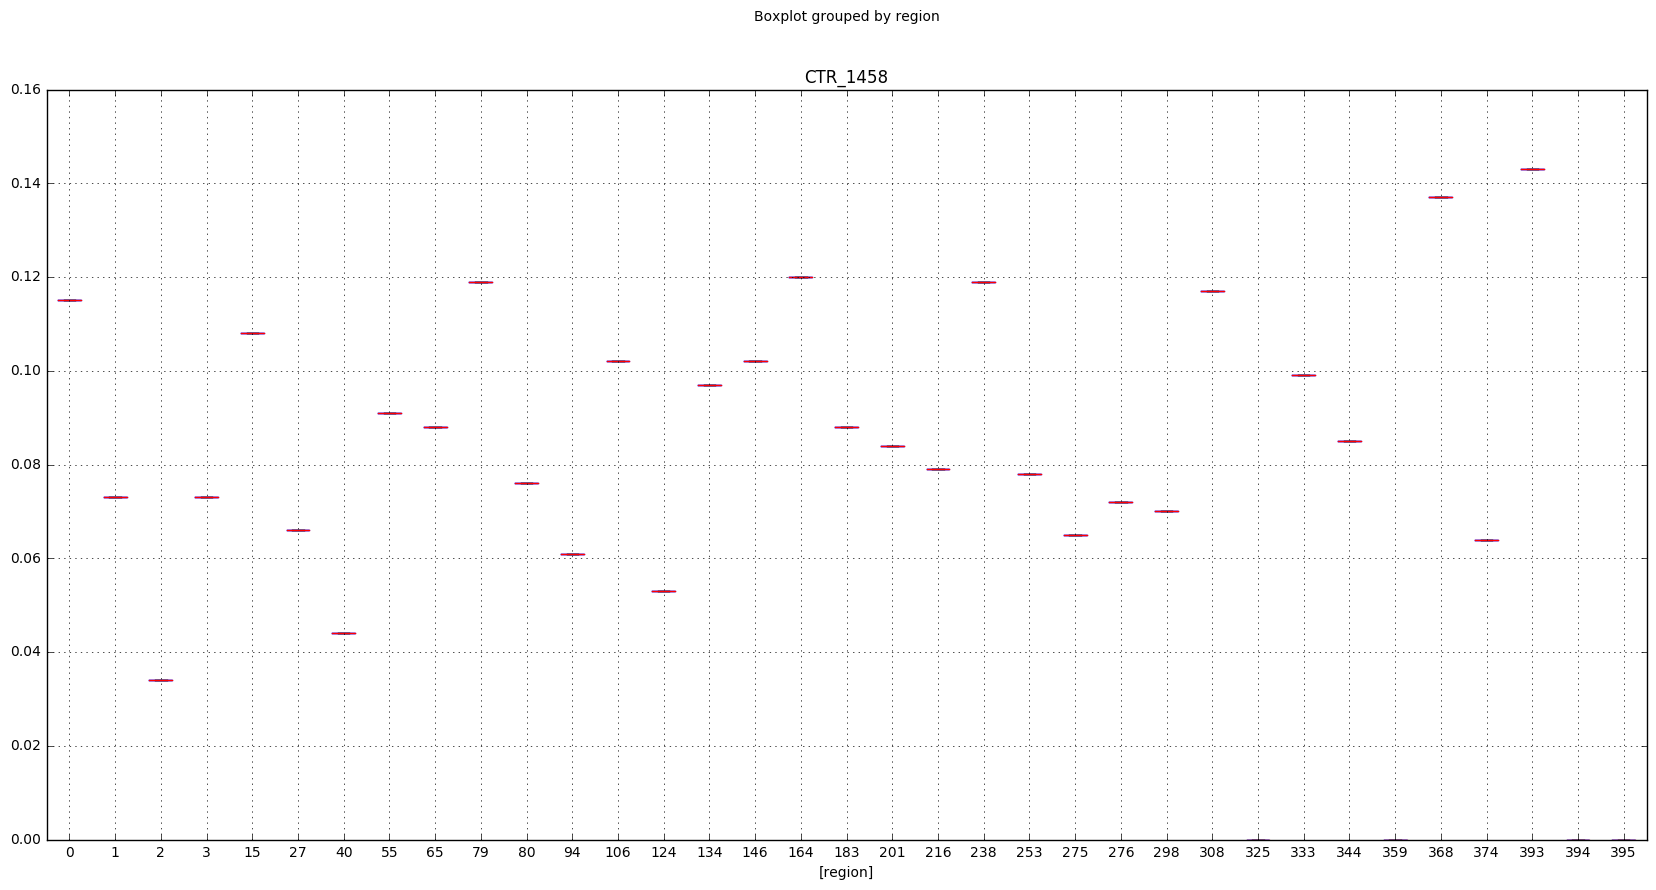

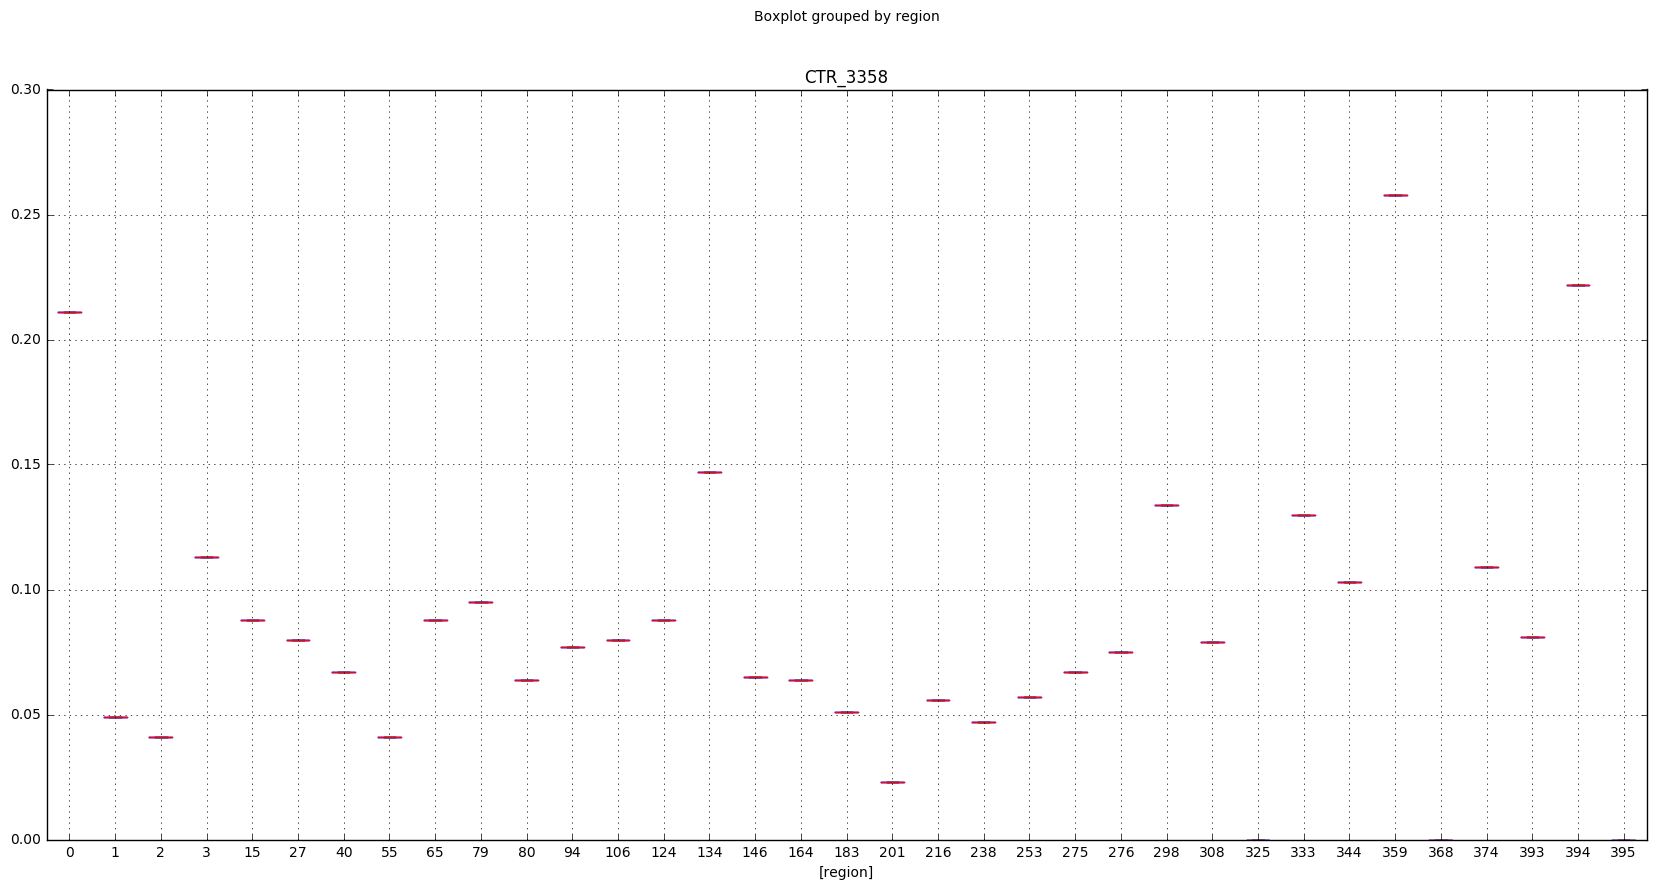

In [101]:
# Boxplot of CTR per region for advertiser 1458 & 3358
a1=region_CTR[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(20,10))
a2 = region_CTR[['region','CTR_3358']]
a2.boxplot(by='region',figsize=(20,10))

In [102]:
# 4. Analyzing CTR per ad exchange
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) * 100).round(3)

In [103]:
adexchange_CTR

,ad_exchange,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,1,182219,159379,146,146,0.080,0.092
1,2,160460,93691,126,48,0.079,0.051
2,3,197614,51712,179,39,0.091,0.075


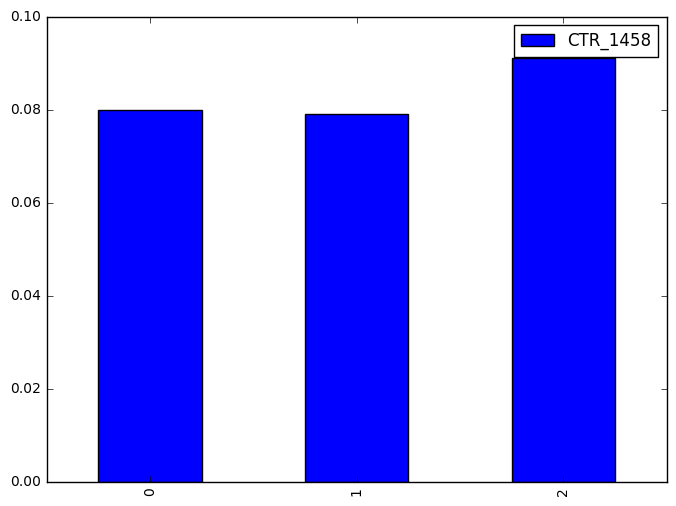

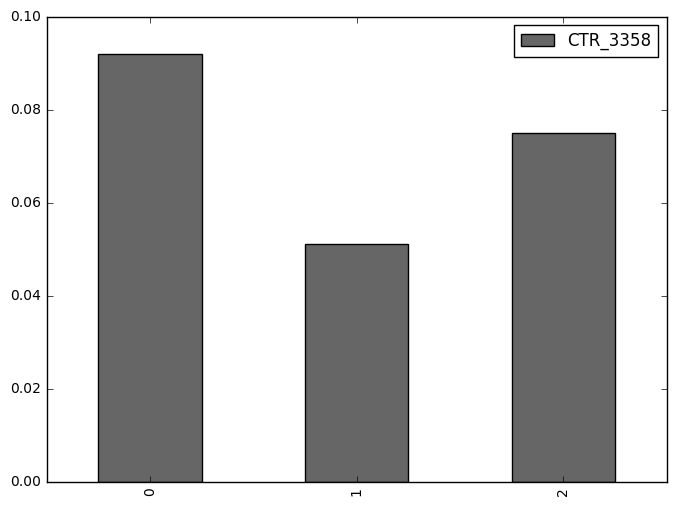

In [104]:
# Boxplot of CTR per ad exchange for advertiser 1458 & 3358
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
ax1 = a1.plot(by='ad_exchange',kind='bar',figsize=(8,6))
a2 = adexchange_CTR[['ad_exchange','CTR_3358']]
a2.plot(by='ad_exchange',kind='bar',colormap='Accent_r',figsize=(8,6))

In [105]:
# 4. Analyzing CTR per user agent
useragent_CTR = pd.DataFrame()

useragent_CTR['useragent'] = np.sort(train.useragent.unique())
useragent_CTR = useragent_CTR.drop([12,18,25])
imp_1458 = train.groupby('useragent').advertiser.value_counts()
useragent_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('useragent').advertiser.value_counts()
imp_3358 = list(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values)
imp_3358 = imp_3358[:22] + [0] + imp_3358[22:]
useragent_CTR['imps_3358'] = imp_3358

click = train.groupby(['advertiser','useragent']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
useragent_CTR['clicks_1458'] = clickall_1458.groupby(level='useragent').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
clickall_3358 = list(clickall_3358.groupby(level='useragent').sum().values)
clickall_3358 = clickall_3358[:22] + [0] + clickall_3358[22:]
useragent_CTR['clicks_3358'] = clickall_3358

useragent_CTR['CTR_1458'] = ((useragent_CTR.clicks_1458 / useragent_CTR.imps_1458) * 100).round(3)
useragent_CTR['CTR_3358'] = ((useragent_CTR.clicks_3358 / useragent_CTR.imps_3358) * 100).round(3)

In [106]:
useragent_CTR.fillna(0.0)

,useragent,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,android_chrome,74,101,1,1,1.351,0.990
1,android_firefox,5,4,0,0,0.000,0.000
2,android_ie,3,2,0,0,0.000,0.000
3,android_maxthon,6,5,0,0,0.000,0.000
4,android_opera,96,145,0,0,0.000,0.000
5,android_other,243,233,2,1,0.823,0.429
6,android_safari,3044,3813,17,15,0.558,0.393
7,android_sogou,1,1,0,0,0.000,0.000
8,ios_other,3,4,0,0,0.000,0.000
9,ios_safari,101,65,0,1,0.000,1.538


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A82C5F1080>], dtype=object)

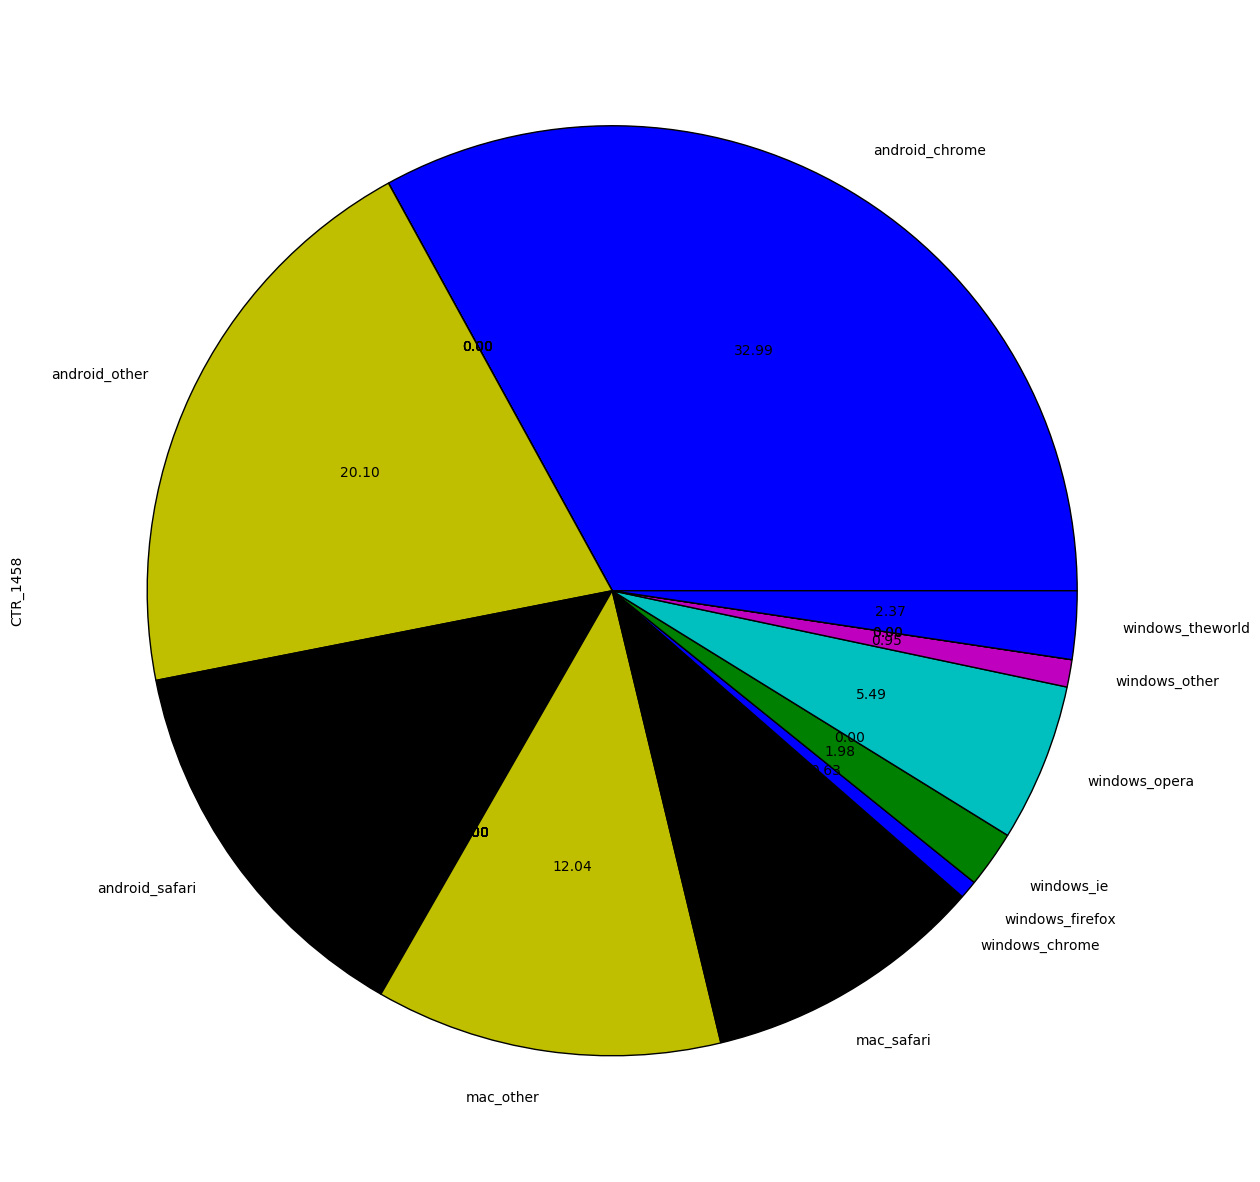

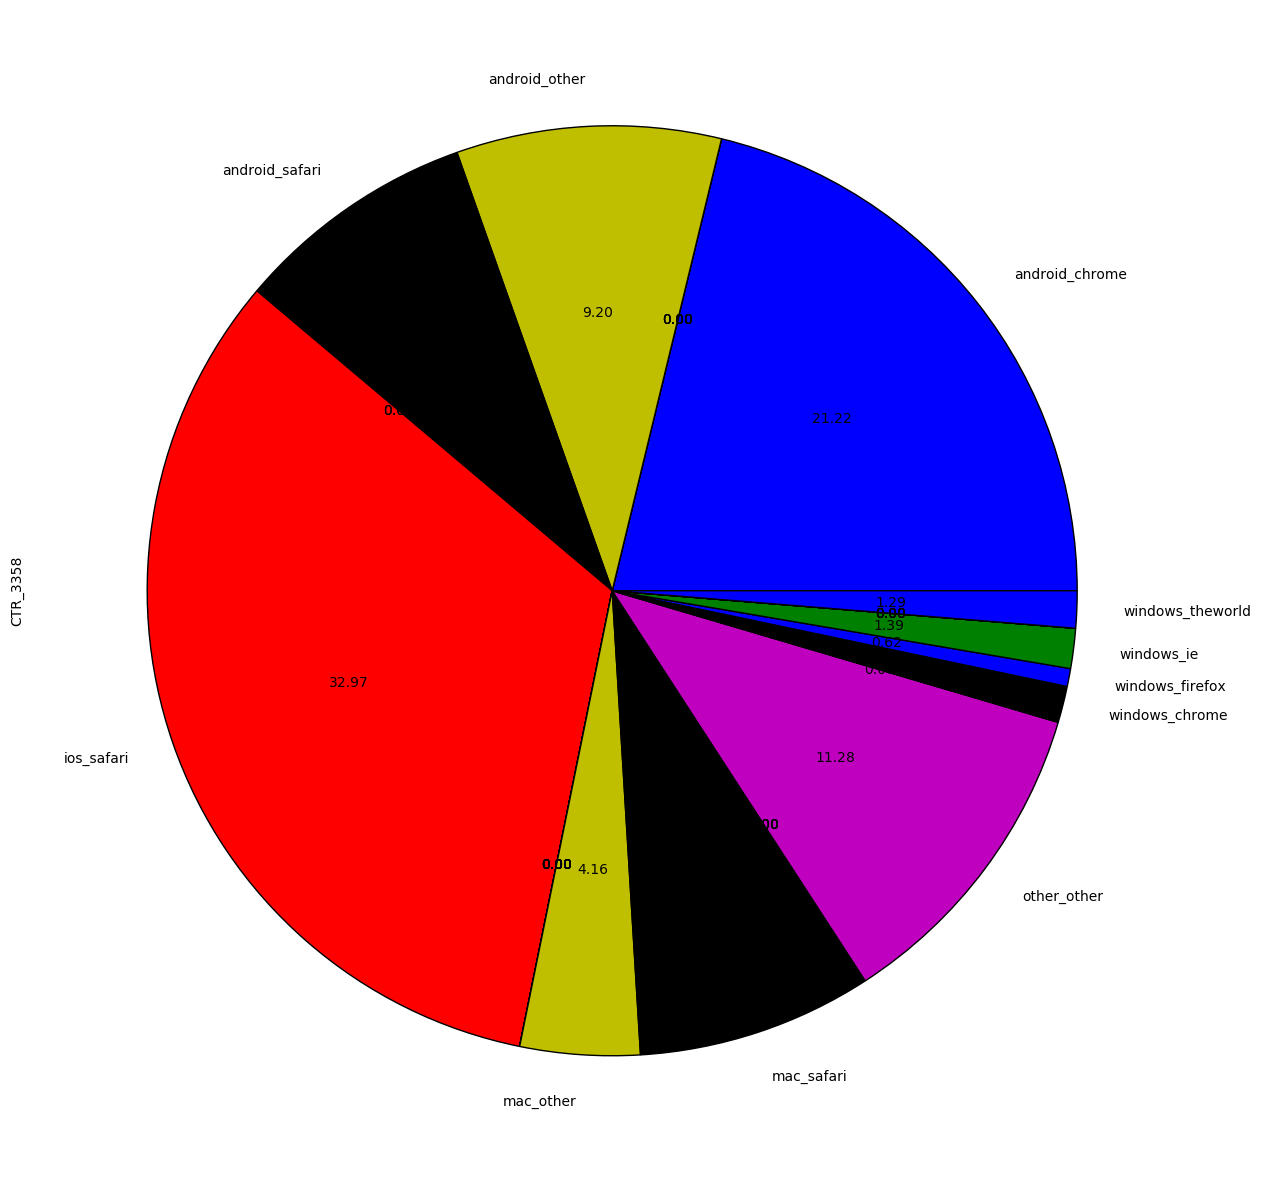

In [107]:
# Boxplot of CTR per user agent for advertiser 1458 & 3358
a1=useragent_CTR[['useragent','CTR_1458']]
a1 = a1.set_index('useragent')
a1.plot(subplots=True, kind='pie',figsize=(15,15), autopct='%0.2f',legend=False)
a2 = useragent_CTR[['useragent','CTR_3358']]
a2 = a2.set_index('useragent')
a2.plot(subplots=True, kind='pie',figsize=(15,15), autopct='%0.2f',legend=False)

# <span style="color:blue">Basic Bidding Strategies</span>. 

# 1. Constant bidding

In [239]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000
    
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1.0
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

const = pd.DataFrame()
const['constants'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(2).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [240]:
const

,constants,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,360.0,289.0,0,0.0,802.78,inf
1,4,882.0,1417.0,0,0.0,1606.58,inf
2,6,5616.0,25000.0,1,0.02,4451.57,25000.0
3,8,4953.0,25001.0,3,0.06,5047.65,8333.67
4,10,4363.0,25000.0,3,0.07,5730.0,8333.33
5,12,3622.0,25007.0,2,0.06,6904.2,12503.5
6,14,3208.0,25000.0,2,0.06,7793.02,12500.0
7,16,2910.0,25009.0,2,0.07,8594.16,12504.5
8,18,2550.0,25008.0,2,0.08,9807.06,12504.0
9,20,2326.0,25002.0,2,0.09,10748.93,12501.0


# 2. Random bidding

In [237]:
from random import randrange

def random_bidding(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000
    
    for click,pay_price in validation[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost
            
randm = pd.DataFrame()
randm['upper_bound'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for upper in randm['upper_bound']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
randm['imps_won'] = im
randm['total_spend'] = ct
randm['clicks'] = clks
randm['CTR'] = (randm.clicks/const.imps_won * 100).round(2).astype(str)
randm['CPM'] = (randm.total_spend/randm.imps_won * 1000).round(2).astype(str)
randm['CPC'] = (randm.total_spend/randm.clicks).round(2).astype(str)

In [238]:
randm

,upper_bound,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,37.0,0.0,0,0.0,0.0,nan
1,4,322.0,391.0,0,0.0,1214.29,inf
2,6,729.0,1604.0,0,0.0,2200.27,inf
3,8,2709.0,11220.0,1,0.08,4141.75,11220.0
4,10,4369.0,20421.0,3,0.29,4674.07,6807.0
5,12,4751.0,25003.0,1,0.12,5262.68,25003.0
6,14,4284.0,25006.0,4,0.54,5837.07,6251.5
7,16,3864.0,25001.0,2,0.34,6470.24,12500.5
8,18,3533.0,25000.0,0,0.0,7076.14,inf
9,20,3243.0,25004.0,3,0.6,7710.14,8334.67


# <span style="color:blue">Linear Bidding Strategies</span>. 

# 1. Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [213]:
X_train = train.drop(['click','bidid','logtype','userid','IP','city','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
y_train = train.click

X_val = validation.drop(['click','bidid','logtype','userid','IP','city','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
y_val = validation.click


X = pd.DataFrame()
X = pd.concat([X_train, X_val])

train_idx = 2697738

In [214]:
# Handling categorical data with one hot encoding

# 1. Encode day of week
X = pd.concat([X,pd.get_dummies(X.weekday,prefix='day')],axis=1)
X = X.drop('weekday',axis=1)

# 2. Encode hours
X = pd.concat([X,pd.get_dummies(X.hour,prefix='hour')],axis=1)
X = X.drop('hour',axis=1)

# Split user agent into 2 ~ OS and browser
df_train = pd.DataFrame(X_train.useragent.str.split('_',1).tolist(),
                                   columns = ['OS','browser'])
df_val = pd.DataFrame(X_val.useragent.str.split('_',1).tolist(),
                                   columns = ['OS','browser'])
df = pd.concat([df_train,df_val])
X = pd.concat([X,df],axis=1)
X = X.drop('useragent',axis=1)

# 3. Encode OS
X = pd.concat([X,pd.get_dummies(X.OS,prefix='OS')],axis=1)
X = X.drop('OS',axis=1)

# 4. Encode browser
X = pd.concat([X,pd.get_dummies(X.browser,prefix='browser')],axis=1)
X = X.drop('browser',axis=1)

In [215]:
# 5. Encode region
X = pd.concat([X,pd.get_dummies(X.region,prefix='region')],axis=1)
X = X.drop('region',axis=1)

# 6. Encode adexchange
X = pd.concat([X,pd.get_dummies(X.adexchange,prefix='adexchange')],axis=1)
X = X.drop('adexchange',axis=1)

In [216]:
# 7. Encode slotwidth
X = pd.concat([X,pd.get_dummies(X.slotwidth,prefix='slotwidth')],axis=1)
X = X.drop('slotwidth',axis=1)

# 8. Encode slotheight
X = pd.concat([X,pd.get_dummies(X.slotheight,prefix='slotheight')],axis=1)
X = X.drop('slotheight',axis=1)

In [217]:
# 9. Encode slotvisibility
X = pd.concat([X,pd.get_dummies(X.slotvisibility,prefix='slotvisibility')],axis=1)
X = X.drop('slotvisibility',axis=1)

# 10. Encode slotformat
X = pd.concat([X,pd.get_dummies(X.slotformat,prefix='slotformat')],axis=1)
X = X.drop('slotformat',axis=1)

# 11. Encode advertiser
X = pd.concat([X,pd.get_dummies(X.advertiser,prefix='advertiser')],axis=1)
X = X.drop('advertiser',axis=1)

In [218]:
# 12. Encoding slotprice into buckets
bins_train = pd.DataFrame()
bins_val = pd.DataFrame()
bins_train['slotprice_bins'] = pd.cut(X_train.slotprice.values,5, labels=[1,2,3,4,5])
bins_val['slotprice_bins'] = pd.cut(X_val.slotprice.values,5, labels=[1,2,3,4,5])
bins = pd.concat([bins_train,bins_val])
X = pd.concat([X,bins],axis=1)
X = pd.concat([X,pd.get_dummies(X.slotprice_bins,prefix='slotprice')],axis=1)

X = X.drop('slotprice',axis=1)
X = X.drop('slotprice_bins',axis=1)

In [219]:
# 13. Encoding user tags using hashing

# a = pd.DataFrame(train.usertag.str.split(',').tolist())
# usertags = pd.Series(a.values.ravel()).unique()

# def hash_col(df, col, vocab):
#     cols = [col + "=" + str(v) for v in vocab]
#     def xform(x): tmp = [0 for i in range(len(vocab))]; tmp[vocab.index(x)] = 1; return pd.Series(tmp,index=cols)
#     df[col] = df[col].str.split(',').tolist()
#     df[cols] = df[col].apply(xform)
#     return df
# df = train
# df2 = hash_col(df, 'usertag', list(usertags))

# from sklearn.feature_extraction import FeatureHasher

# usertag=train.usertag.values
# h = FeatureHasher(n_features=1000, input_type='string')
# f = h.transform(usertag)
# f
# X = pd.concat([X,pd.get_dummies(X.usertag,prefix='usertag')],axis=1)
# X = X.drop('usertag',axis=1)

In [220]:
#Ignore usertag for now
X = X.drop('usertag',axis=1)

In [221]:
X.head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,hour_2,...,advertiser_2997,advertiser_3358,advertiser_3386,advertiser_3427,advertiser_3476,slotprice_1,slotprice_2,slotprice_3,slotprice_4,slotprice_5
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [222]:
# Data to pass to sklearn classifier
X.columns

Index(['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'hour_0',
       'hour_1', 'hour_2',
       ...
       'advertiser_2997', 'advertiser_3358', 'advertiser_3386',
       'advertiser_3427', 'advertiser_3476', 'slotprice_1', 'slotprice_2',
       'slotprice_3', 'slotprice_4', 'slotprice_5'],
      dtype='object', length=150)

In [223]:
# Split back into a training and validation set
X_train = X[:train_idx]
X_val = X[train_idx:]

# Fit a classification model
clf_l2_LR = LogisticRegression(penalty='l2', class_weight='balanced')
y_pred = clf_l2_LR.fit(X_train, y_train).predict(X_val)

In [224]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [225]:
from sklearn import metrics
metrics.accuracy_score(y_val, y_pred)

0.71968213405215697

In [226]:
metrics.confusion_matrix(y_val, y_pred)

array([[215586,  83937],
       [    88,    138]])

In [227]:
predprobs = clf_l2_LR.predict_proba(X_val)

pCTR = pd.DataFrame(predprobs)
pCTR

,0,1
0,0.570460,0.429540
1,0.083788,0.916212
2,0.399976,0.600024
3,0.414762,0.585238
4,0.655806,0.344194
5,0.642176,0.357824
6,0.541541,0.458459
7,0.628589,0.371411
8,0.662439,0.337561
9,0.639730,0.360270


<p>Linear Bidding Function</p>
bid = base_bid * pCTR / avgCTR

In [228]:
# Average CTR
avgCTR = (train.click.sum() / train.logtype.sum()) * 100
avgCTR

0.075396498844587587

In [233]:
# Linear bids for the bid range
base_bids = np.arange(2,302,2)

bids = []
for base_bid in base_bids:
    for p in pCTR[1]:
        bid = base_bid * p / avgCTR
        bids.append(bid)

bid_chunks = [bids[x:x+len(pCTR)] for x in range(0, len(bids), len(pCTR))]

In [234]:
def linear_bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 25000
    
    bool_check = bids >= validation.payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost

lin = pd.DataFrame()
lin['bid'] = base_bids

im = []
clks = []
ct = []

for bids in bid_chunks:
    [imps, clicks, cost] = linear_bidding(bids)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
lin['imps_won'] = im
lin['total_spend'] = ct
lin['clicks'] = clks
lin['CTR'] = (const.clicks/const.imps_won * 100).round(2).astype(str)
lin['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
lin['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [235]:
lin

,bid,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,3447.0,25005.0,3,0.07,5730.0,8333.33
1,4,1833.0,25000.0,2,0.09,10748.93,12501.0
2,6,1285.0,25011.0,1,0.07,16357.1,25010.0
3,8,967.0,25014.0,0,0.0,20473.0,inf
4,10,696.0,25019.0,1,0.0,23908.22,inf
5,12,572.0,25055.0,1,0.0,31198.25,inf
6,14,543.0,25016.0,1,0.0,33951.15,inf
7,16,503.0,25033.0,1,0.17,42735.49,25043.0
8,18,498.0,25138.0,1,0.19,48740.74,25004.0
9,20,469.0,25070.0,1,0.2,50313.88,25006.0


In [276]:
#best bids
a = list((np.where(lin.clicks == lin.clicks.max()))[0])
bid_chunks[a.pop()]

[11.394152593280657,
 24.303847219420177,
 15.916486254665958,
 15.524277463655576,
 9.1302373031874406,
 9.4917854135896107,
 12.1612820860881,
 9.8522076434092458,
 8.9542853758408398,
 9.5566860531526956,
 16.476615839058372,
 10.416992124773218,
 14.192219619886325,
 17.009296198309023,
 15.127806075279052,
 10.127402518917059,
 13.421733782250508,
 10.813028897557519,
 14.489407605556725,
 11.644594880259284,
 5.0334869668979421,
 6.1453573210937318,
 10.456771931213575,
 0.092058721568347601,
 11.757723355436225,
 6.7571007637879816,
 9.3915890781823119,
 9.1905173299543446,
 4.2871630517917936,
 10.504821081821351,
 12.310156522080735,
 9.1894736682556033,
 5.0685237300150874,
 4.6690243998107119,
 15.776250152607389,
 14.068644079736876,
 5.1414790213408352,
 9.4021410177303917,
 7.4328193740917108,
 17.466945275380372,
 7.5694244551791279,
 11.805961177779949,
 8.2858263212069971,
 12.511096879732429,
 12.241446186285623,
 22.637682009606323,
 19.114474541700456,
 15.832160659